/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 201MB/s]


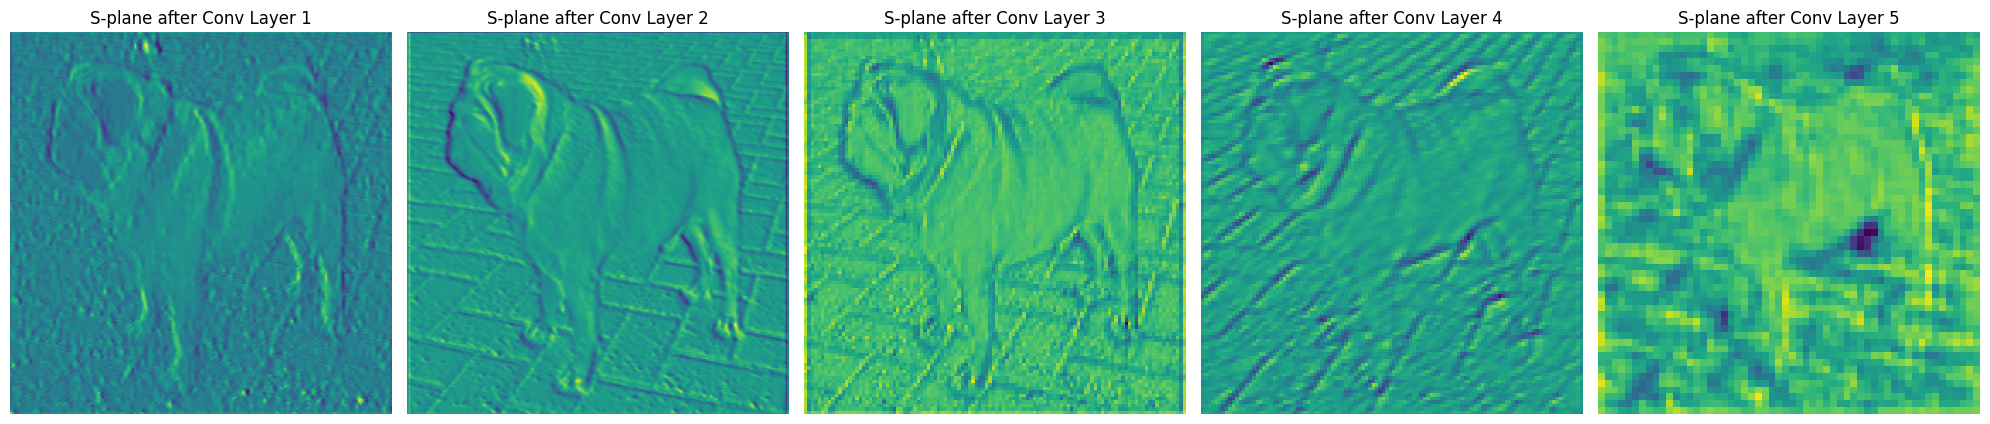

In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Load and preprocess an image
url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Pug_600.jpg"
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])
img_tensor = transform(image).unsqueeze(0)

# Load pretrained VGG16 model
model = models.vgg16(pretrained=True).features
model.eval()

# Pass image through first few conv layers
features = []
x = img_tensor # img_tensor shape: [1, 3, 224, 224] — 1 image, 3 channels
with torch.no_grad():
    for layer in model:
        x = layer(x)
        if isinstance(layer, torch.nn.Conv2d):
            features.append(x[0, 0].clone())  # First channel of batch  <<< THIS IS THE S-PLANE
        if len(features) == 5: break

# Plot the spatial planes (S-planes)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    axs[i].imshow(features[i].numpy(), cmap="viridis")
    axs[i].set_title(f"S-plane after Conv Layer {i+1}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()
